In [1]:

import os
import sys

import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig

current_dir = os.getcwd()
information_metrics_dir = os.path.dirname(current_dir)
sys.path.append(information_metrics_dir)

import spatial_metrics.helper_functions as hf
import spatial_metrics.spatial_metrics_calcium_binarized_base as sm
import spatial_metrics.bootstrapped_estimation as be

%matplotlib widget




'''
If you don't have calcium signal, this part simulates the calcium activity
from a place cell in a 2D enviroment.

You should first set your environment edges. You can think of it as a retangular box in cm.
environment_edges = [[0,30],[0,50]] # in cm [[x_min,x_max],[y_min,y_max]]

Now set the number of place fields (if num_of_fields = 0, then the cell is not a place cell),
their location in the enviroment, and their respective sizes.
'''


In [2]:
# Arguments taken from the paper "Hippocampal Place Fields Maintain a Coherent and
# Flexible Map across Long Timescales"

# Here we will load data from Kinsky et al. paper and use their definitions
# 
import os
from pathlib import Path

# Get the current working directory
current_dir = Path.cwd()
current_dir

project_root = current_dir.parent 
project_root = '/home/apolo/Documents/github_projects/information_metrics'
# data_dir = f"{project_root}/data/Kinsky/Mouse1 - G30/day 1/1 - square/"
# data_dir = f"{project_root}/data/Kinsky/Mouse1 - G30/day 4/1 - square/"
# data_dir = f"{project_root}/data/Kinsky/Mouse2 - G31/day 4/1 - square/"
data_dir = f"{project_root}/data/Kinsky/Mouse3 - G45/day 1/1 - square/"
# data_dir = f"{project_root}/data/Kinsky/Mouse3 - G45/day 4/1 - square/"
# data_dir = f"{project_root}/data/Kinsky/Mouse4 - G48/day 4/1 - square/"
# data_dir = f"{project_root}/data/Kinsky/Mouse4 - G48/day 4/2 - square 90CW/"

os.chdir(data_dir)


In [3]:
import h5py
import mat73
from scipy.io import loadmat


In [4]:

mat_file = 'Pos_align.mat'
mat_dict = loadmat(mat_file,simplify_cells=True)
mat_dict


{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Wed Feb 01 10:54:19 2017',
 '__version__': '1.0',
 '__globals__': [],
 'base_struct': {'Animal': 'GCamp6f_45',
  'Date': '08_28_2015',
  'Session': 1,
  'Env': '2env - square right',
  'Room': '201a - 2015',
  'Location': 'J:\\GCamp Mice\\Working\\G45\\2env\\08_28_2015\\1 - square right\\Working',
  'Notes': 'square right',
  'exclude_frames': array([], dtype=float64),
  'Pix2CM': 0.0874,
  'RecordStartTime': array([], dtype=float64)},
 'auto_rotate_to_std': 0,
 'xmin': 8.09840407472349,
 'ymin': 17.942047516521423,
 'PSAbool': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], shape=(714, 12153), dtype=uint8),
 'LPtrace': array([[-1.3488913e-02, -1.3088757e-02, -1.1530025e-02, ...,
         -8.9209862e-03, -9.3567763e-03, -9.4797667e-03],
        [-1.3943331e-

In [5]:

x_coordinates = mat_dict['x_adj_cm']
y_coordinates = mat_dict['y_adj_cm']
time_vector = mat_dict['time_interp']

raw_trace = mat_dict['RawTrace'] # raw signal
lp_trace = mat_dict['LPtrace'] # filtered signal
dfdt_trace = mat_dict['DFDTtrace'] # diff signal
psabool_trace = mat_dict['PSAbool'] # binarized signal
speed = mat_dict['speed']
sampling_rate = 20 # info taken from their paper
raw_trace.shape

(714, 12153)

In [ ]:
# Cells from fig 2C are 49,127,211,267 from
# data_dir = f"{project_root}/data/Kinsky/Mouse3 - G45/day 1/1 - square/"


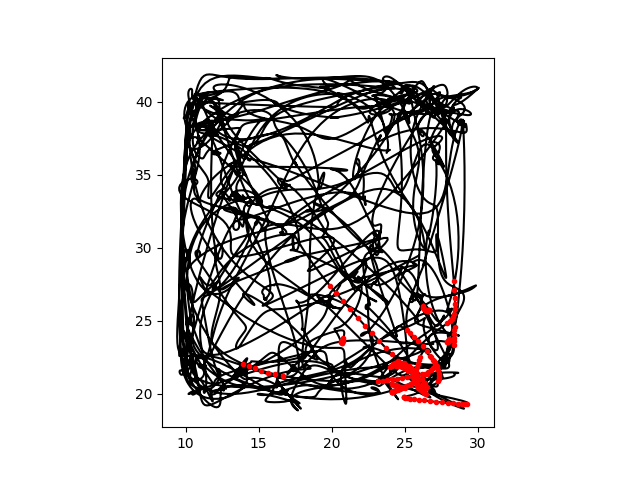

In [6]:
cell = 267

plt.figure()
plt.plot(x_coordinates,y_coordinates,'k')
plt.plot(x_coordinates[psabool_trace[cell,:] == 1],y_coordinates[psabool_trace[cell,:]==1],'r.')
plt.gca().set_aspect('equal')
plt.show()


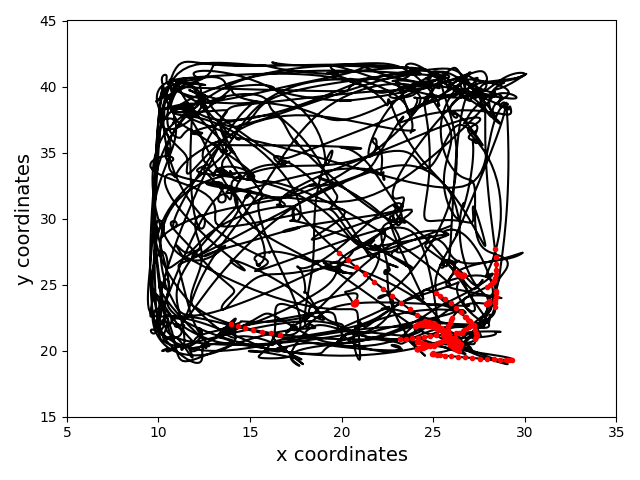

In [7]:
# environment_edges = [[10,50],[35,70]]
environment_edges = [[5,35],[15,45]]
plt.figure()
plt.plot(x_coordinates,y_coordinates,'k')
plt.plot(x_coordinates[psabool_trace[cell,:] == 1],y_coordinates[psabool_trace[cell,:]==1],'r.')
plt.xlabel('x coordinates',fontsize=14)
plt.ylabel('y coordinates',fontsize=14)
plt.xlim([environment_edges[0][0],environment_edges[0][1]])
plt.ylim([environment_edges[1][0],environment_edges[1][1]])
plt.tight_layout()
plt.show()



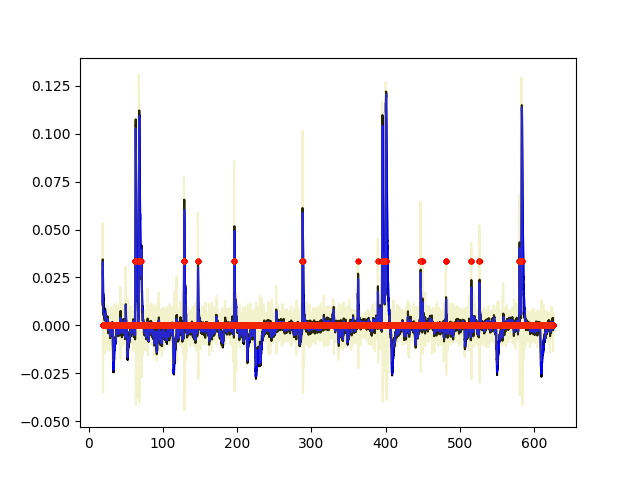

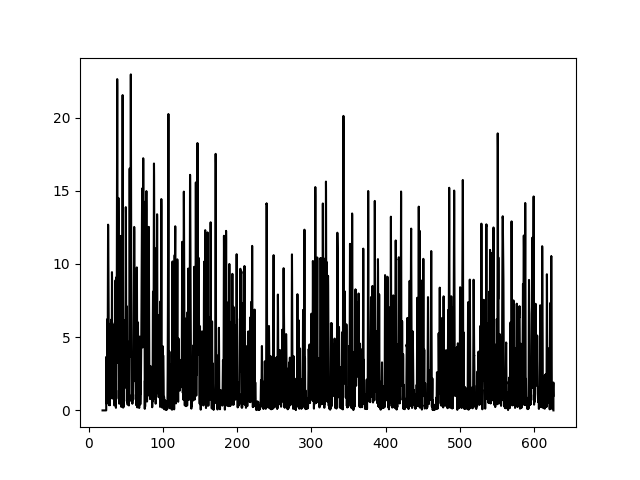

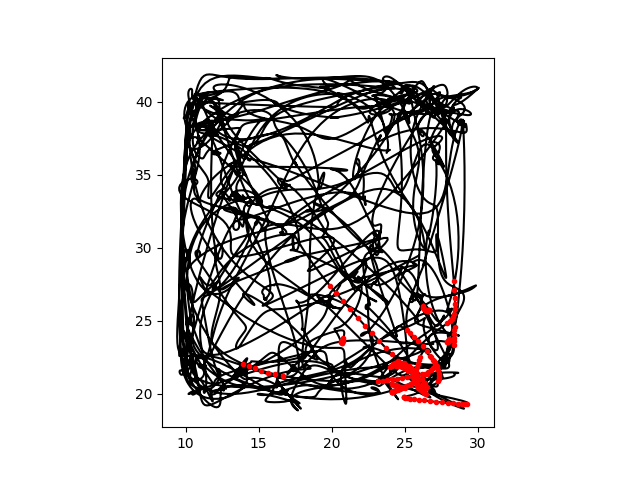

In [8]:
# 49,127,211,267
cell = 267
plt.figure()
plt.plot(time_vector,raw_trace[cell,:],'k')
plt.plot(time_vector,lp_trace[cell,:],'b')
plt.plot(time_vector,psabool_trace[cell,:]/30,'r.')
plt.plot(time_vector,dfdt_trace[cell,:]/100,'y',alpha=0.2)
plt.show()

plt.figure()
plt.plot(time_vector,speed,'k')
plt.show()

plt.figure()
plt.plot(x_coordinates,y_coordinates,'k')
plt.plot(x_coordinates[psabool_trace[cell,:] == 1],y_coordinates[psabool_trace[cell,:]==1],'r.')


plt.gca().set_aspect('equal')
plt.show()


In [58]:
# # Load simulated data:

# output_dict = np.load('simulated_signal.npy',allow_pickle=True).item()
# signal = output_dict['signal']
# time_vector = output_dict['time_vector']
# x_coordinates = output_dict['x_coordinates']
# y_coordinates = output_dict['y_coordinates']
# modulated_spike_times_idx = output_dict['spike_times']
# environment_edges = output_dict['environment_edges']
# sampling_rate = output_dict['sampling_rate']

# signal_norm = hf.min_max_norm(signal)


In [9]:

cell = 267
input_signal = psabool_trace[cell,:]
signal_norm = lp_trace[cell,:]
signal_type = 'Binarized'


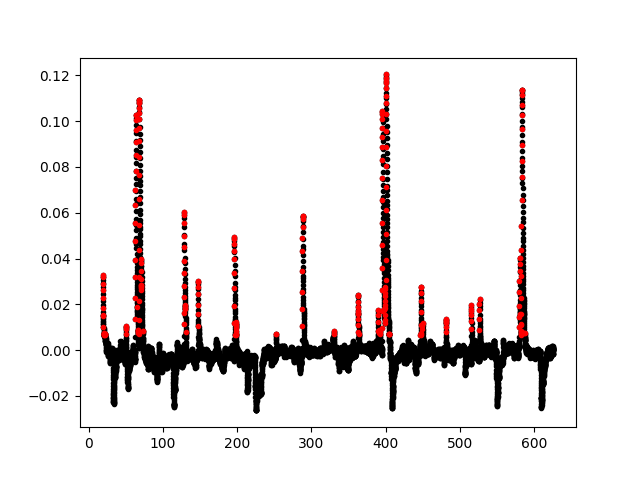

In [11]:
# # play with z_threshold just to decide which one is the best for your data

signal_type = 'Binarized'
sampling_rate = 1 / np.nanmean(np.diff(time_vector))
input_signal = hf.preprocess_signal(signal_norm,sampling_rate,signal_type,z_threshold = 0.5)

plt.figure()
plt.plot(time_vector,signal_norm,'k.')
plt.plot(time_vector[input_signal==1],signal_norm[input_signal==1],'r.')
# plt.plot(time_vector[input_signal==1],signal_norm[input_signal==1],'r.')
# plt.plot(time_vector,input_signal,'r.')
plt.show()


In [10]:
environment_edges = [[5,35],[15,45]]


In [ ]:

# Calculate the video sampling rate as the reciprocal of the average time difference between consecutive timestamps.
# This is an approximation for cameras with varying frame rates.
signal_type = 'Binarized'
sampling_rate = 1 / np.nanmean(np.diff(time_vector))

# Create a dictionary to hold input parameters for further processing
input_dict = dict()

# Construct the filename and other identifiers for saving the results
input_dict['saving_string'] = 'SpatialMetrics.' + signal_type  # Prefix for the filename
input_dict['animal_id'] = 'NeuronModel'  # Identifier for the animal or model
input_dict['dataset'] = 'Simulation'  # Name of the dataset
input_dict['day'] = 1  # Day or session number
input_dict['neuron'] = 1  # Neuron identifier
input_dict['trial'] = None  # Trial identifier (optional, can be None)
input_dict['saving_path'] = None  # Directory path for saving results (optional, can be None)
input_dict['saving'] = False  # Flag indicating whether to save the results (False means no saving)

# Set parameters related to the signal and environment
input_dict['sampling_rate'] = sampling_rate  # Sampling rate in points per second
input_dict['environment_edges'] = environment_edges  # Coordinates defining the edges of the environment (in coordinate units)

# Set inclusion criteria for the analysis
input_dict['min_time_spent'] = 0  # Minimum time an animal must spend in each xy bin in time_vector units (usually, in seconds)
input_dict['min_visits'] = 1  # Minimum number of visits required in each xy bin
input_dict['min_speed_threshold'] = 1  # Minimum speed threshold (in coordinate units [e.g., cm, pixels])
input_dict['speed_smoothing_sigma'] = 1  # Speed threshold (in coordinate units [e.g., cm, pixels])

# Set parameters for calculating mutual information
input_dict['x_bin_size'] = 1  # Size of x bins (in coordinate units [e.g., cm, pixels])
input_dict['y_bin_size'] = 1  # Size of y bins (in coordinate units [e.g., cm, pixels])

# Set parameters for surrogate analysis
input_dict['shift_time'] = 200  # Time shift window in seconds for creating surrogate distributions
input_dict['num_cores'] = -1  # Number of CPU cores to use (set to -1 to use all available cores)
input_dict['num_surrogates'] = 800  # Number of surrogate distributions to generate

# Set parameters for plotting activity map
input_dict['map_smoothing_sigma'] = 2.5  # Size of the gaussian smoothing area (std in coordinate units [e.g., cm, pixels]) for plotting activity maps
# Set parameters for place fields detection
input_dict['min_num_of_bins'] = 2  # Minimum number of xy-bins required to define a place field

input_dict['field_detection_method'] = 'std_from_field'  # place field detection method (std_from_field or random_fields)
input_dict['percentile_threshold'] = 95  # Percentile threshold for determining place field boundaries when field_detection_method = 'random_fields'
input_dict['detection_threshold'] = 1 # place field detection threshold in std when field_detection_method = 'std_from_field'
input_dict['detection_smoothing_sigma'] = 2.5  # Gaussian 2D std of the smoothing area in coordinate units for detecting place fields when field_detection_method = 'std_from_field'

spatial_metrics = sm.PlaceCellBinarized(**input_dict)
spatial_metrics_output = spatial_metrics.main(input_signal,time_vector,x_coordinates,y_coordinates)


Processing Surrogates:   0%|          | 0/800 [00:00<?, ?it/s]

  0%|          | 0/800 [00:00<?, ?it/s]

In [ ]:
# make sure the sigma points are correct. They should reflect the unit from which it`s called
# in the case of speed, it should be time_vector

In [ ]:

plt.figure()
# plt.pcolormesh(spatial_metrics_output['x_center_bins'],spatial_metrics_output['y_center_bins'],spatial_metrics_output['activity_map'],shading = 'auto',edgecolors=None)
# plt.pcolormesh(spatial_metrics_output['x_grid'],spatial_metrics_output['y_grid'],spatial_metrics_output['activity_map'],edgecolors='red')
plt.pcolormesh(spatial_metrics_output['x_grid'],spatial_metrics_output['y_grid'],spatial_metrics_output['activity_map'],edgecolors=None)
plt.colorbar()
plt.plot(spatial_metrics_output['x_peaks_location'],spatial_metrics_output['y_peaks_location'],color = 'red',linestyle='',marker='.',markersize=6,alpha=0.2)

plt.title('Place Field with calcium peaks',fontsize=16)
plt.xlabel('x coordinates',fontsize=14)
plt.ylabel('y coordinates',fontsize=14)
plt.xlim([environment_edges[0][0],environment_edges[0][1]])
plt.ylim([environment_edges[1][0],environment_edges[1][1]])
plt.tight_layout()
plt.show()



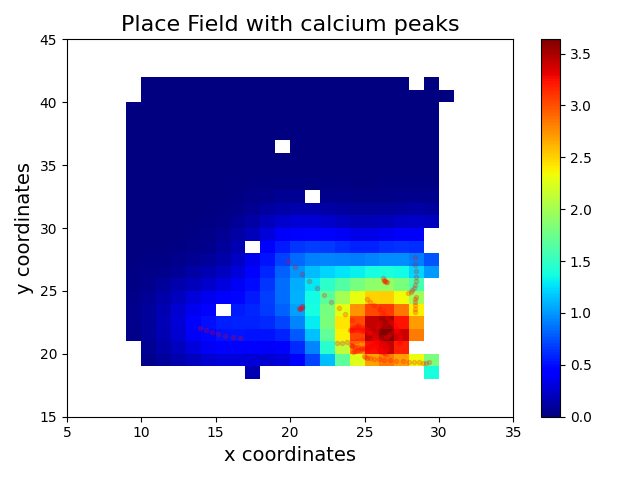

In [16]:

nan_mask = np.isnan(spatial_metrics_output['activity_map'])
activity_map_smoothed = spatial_metrics_output['activity_map_smoothed'].copy()
activity_map_smoothed[nan_mask] = np.nan

plt.figure()
# plt.pcolormesh(spatial_metrics_output['x_grid'],spatial_metrics_output['y_grid'],spatial_metrics_output['activity_map_smoothed'],edgecolors=None,cmap='jet')
plt.pcolormesh(spatial_metrics_output['x_grid'],spatial_metrics_output['y_grid'],activity_map_smoothed,edgecolors=None,cmap='jet')

plt.plot(spatial_metrics_output['x_peaks_location'],spatial_metrics_output['y_peaks_location'],color = 'red',linestyle='',marker='.',markersize=6,alpha=0.2)
plt.colorbar()
plt.title('Place Field with calcium peaks',fontsize=16)
plt.xlabel('x coordinates',fontsize=14)
plt.ylabel('y coordinates',fontsize=14)
plt.xlim([environment_edges[0][0],environment_edges[0][1]])
plt.ylim([environment_edges[1][0],environment_edges[1][1]])
plt.tight_layout()
plt.show()



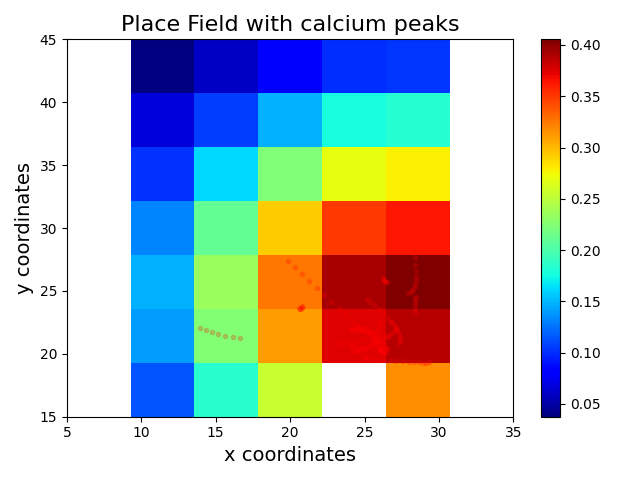

In [25]:
nan_mask = np.isnan(spatial_metrics_output['activity_map'])
activity_map_smoothed = spatial_metrics_output['activity_map_smoothed'].copy()
activity_map_smoothed[nan_mask] = np.nan

plt.figure()
plt.pcolormesh(spatial_metrics_output['x_grid'],spatial_metrics_output['y_grid'],activity_map_smoothed,edgecolors=None,cmap='jet')

plt.plot(spatial_metrics_output['x_peaks_location'],spatial_metrics_output['y_peaks_location'],color = 'red',linestyle='',marker='.',markersize=6,alpha=0.2)
plt.colorbar()
plt.title('Place Field with calcium peaks',fontsize=16)
plt.xlabel('x coordinates',fontsize=14)
plt.ylabel('y coordinates',fontsize=14)
plt.xlim([environment_edges[0][0],environment_edges[0][1]])
plt.ylim([environment_edges[1][0],environment_edges[1][1]])
plt.tight_layout()
plt.show()



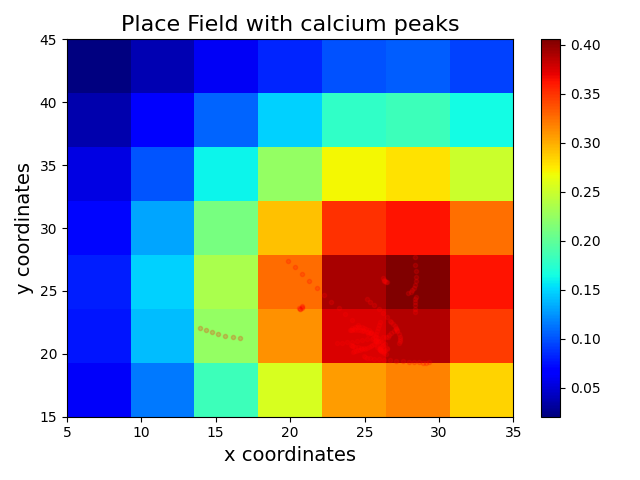

In [26]:

plt.figure()
# plt.pcolormesh(spatial_metrics_output['x_center_bins'],spatial_metrics_output['y_center_bins'],spatial_metrics_output['activity_map'],shading = 'auto',edgecolors=None)
# plt.pcolormesh(spatial_metrics_output['x_grid'],spatial_metrics_output['y_grid'],spatial_metrics_output['activity_map'],edgecolors='red')
plt.pcolormesh(spatial_metrics_output['x_grid'],spatial_metrics_output['y_grid'],spatial_metrics_output['activity_map_smoothed'],edgecolors=None,cmap='jet')

plt.plot(spatial_metrics_output['x_peaks_location'],spatial_metrics_output['y_peaks_location'],color = 'red',linestyle='',marker='.',markersize=6,alpha=0.2)
plt.colorbar()
plt.title('Place Field with calcium peaks',fontsize=16)
plt.xlabel('x coordinates',fontsize=14)
plt.ylabel('y coordinates',fontsize=14)
plt.xlim([environment_edges[0][0],environment_edges[0][1]])
plt.ylim([environment_edges[1][0],environment_edges[1][1]])
plt.tight_layout()
plt.show()



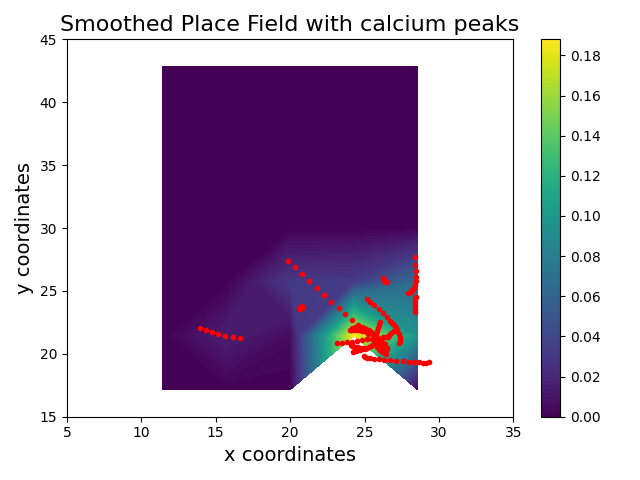

In [27]:

plt.figure()
plt.contourf(spatial_metrics_output['x_center_bins'],spatial_metrics_output['y_center_bins'],spatial_metrics_output['activity_map'],100,cmap='viridis')
plt.plot(spatial_metrics_output['x_peaks_location'],spatial_metrics_output['y_peaks_location'],color = 'red',linestyle='',marker='.',markersize=6)
plt.colorbar()
plt.title('Smoothed Place Field with calcium peaks',fontsize=16)
plt.xlabel('x coordinates',fontsize=14)
plt.ylabel('y coordinates',fontsize=14)
plt.xlim([environment_edges[0][0],environment_edges[0][1]])
plt.ylim([environment_edges[1][0],environment_edges[1][1]])
# plt.gca().set_aspect('equal')
plt.tight_layout()
plt.show()



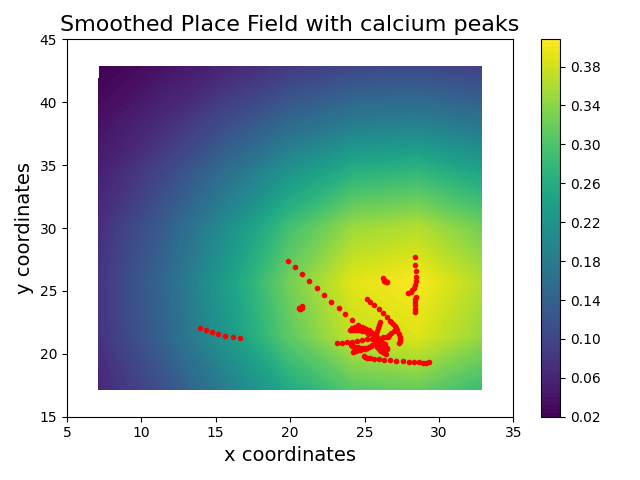

In [28]:


plt.figure()
plt.contourf(spatial_metrics_output['x_center_bins'],spatial_metrics_output['y_center_bins'],spatial_metrics_output['activity_map_smoothed'],100,cmap='viridis')
plt.plot(spatial_metrics_output['x_peaks_location'],spatial_metrics_output['y_peaks_location'],color = 'red',linestyle='',marker='.',markersize=6)
plt.colorbar()
plt.title('Smoothed Place Field with calcium peaks',fontsize=16)
plt.xlabel('x coordinates',fontsize=14)
plt.ylabel('y coordinates',fontsize=14)
plt.xlim([environment_edges[0][0],environment_edges[0][1]])
plt.ylim([environment_edges[1][0],environment_edges[1][1]])
# plt.gca().set_aspect('equal')
plt.tight_layout()
plt.show()



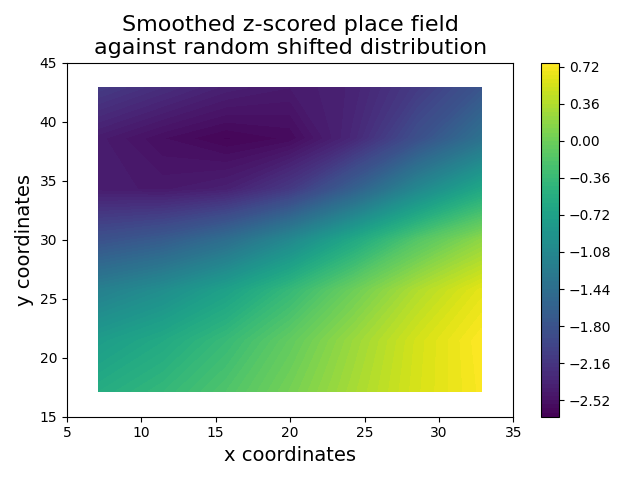

In [29]:

mean_activity_map_shifted = np.nanmean(spatial_metrics_output['activity_map_smoothed_shifted'],0)
std_activity_map_shifted = np.nanstd(spatial_metrics_output['activity_map_smoothed_shifted'],0)
activity_map_smoothed = spatial_metrics_output['activity_map_smoothed'].copy()
activity_map_smoothed_zscored = (activity_map_smoothed - mean_activity_map_shifted)/std_activity_map_shifted

plt.figure()
plt.contourf(spatial_metrics_output['x_center_bins'],spatial_metrics_output['y_center_bins'],activity_map_smoothed_zscored,100)
plt.colorbar()
plt.title('Smoothed z-scored place field\nagainst random shifted distribution',fontsize=16)
plt.xlabel('x coordinates',fontsize=14)
plt.ylabel('y coordinates',fontsize=14)
plt.xlim([environment_edges[0][0],environment_edges[0][1]])
plt.ylim([environment_edges[1][0],environment_edges[1][1]])
plt.tight_layout()
plt.show()


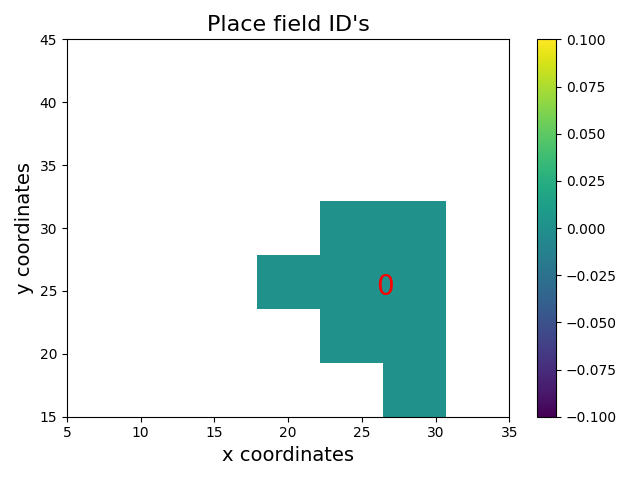

In [30]:

place_cells_x_center_coord = spatial_metrics_output['fields_x_max']
place_cells_y_center_coord = spatial_metrics_output['fields_y_max']

plt.figure()
plt.pcolormesh(spatial_metrics_output['x_center_bins'],spatial_metrics_output['y_center_bins'],spatial_metrics_output['activity_map_identity'])
plt.colorbar()

for counter,(x, y) in enumerate(zip(place_cells_x_center_coord, place_cells_y_center_coord)):
    plt.text(x, y, str(counter), color='red',fontsize=20)

plt.title("Place field ID's",fontsize=16)
plt.xlabel('x coordinates',fontsize=14)
plt.ylabel('y coordinates',fontsize=14)
plt.xlim([environment_edges[0][0],environment_edges[0][1]])
plt.ylim([environment_edges[1][0],environment_edges[1][1]])
plt.tight_layout()
plt.show()



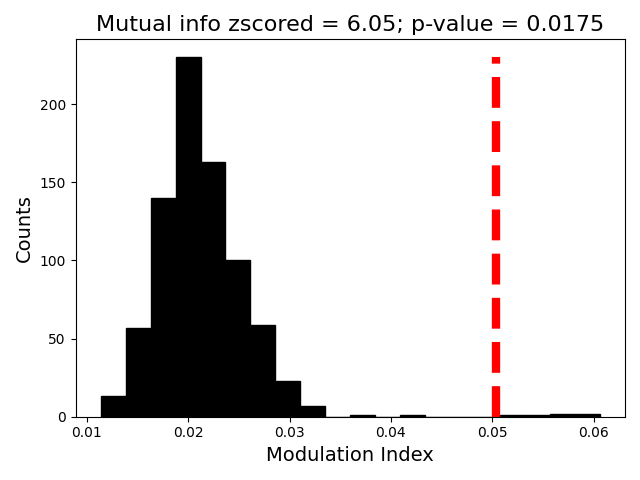

In [31]:
statistic = be.calculate_p_value(spatial_metrics_output['mutual_info_original'], spatial_metrics_output['mutual_info_shifted'], alternative='two-sided')

counts,bins = np.histogram(spatial_metrics_output['mutual_info_shifted'],20)
bins_centers = bins[0:-1] + np.diff(bins)
bin_width = np.diff(bins_centers)[0]

plt.figure()
plt.bar(bins_centers,counts,color='black',width=bin_width,linewidth=1,edgecolor='black')
plt.plot([spatial_metrics_output['mutual_info_original'],spatial_metrics_output['mutual_info_original']],[0,np.max(counts)],'r--',linewidth=6)
plt.title("Mutual info zscored = {0:.2f}; p-value = {1:.4f}".format(spatial_metrics_output['mutual_info_zscored'],statistic.p_value),fontsize=16)
plt.xlabel('Modulation Index',fontsize=14)
plt.ylabel('Counts',fontsize=14)
plt.tight_layout()
plt.show()


In [33]:

def get_mutual_information(calcium_imag, position_binned):

    # I've translated this code to Python. 
    # Originally I took it from https://github.com/etterguillaume/CaImDecoding/blob/master/extract_1D_information.m
    # https://github.com/nkinsky/ImageCamp/blob/e48c6fac407ef3997b67474a2333184bbc4915dc/General/CalculateSpatialInfo.m

    # I'm calling the input variable as calcium_imag just for the sake of class inheritance, but a better name
    # would be binarized_signal
    bin_vector = np.unique(position_binned)

    # Create bin vectors
    prob_being_active = np.nansum(calcium_imag) / calcium_imag.shape[0]  # Expressed in probability of firing (<1)

    # Compute joint probabilities (of cell being active while being in a state bin)
    likelihood = []
    occupancy_vector = []

    mutual_info = 0
    for i in range(bin_vector.shape[0]):
        position_idx = position_binned == bin_vector[i]

        if np.sum(position_idx) > 0:
            occupancy_vector.append(position_idx.shape[0] / position_binned.shape[0])

            activity_in_bin_idx = np.where((calcium_imag == 1) & position_idx)[0]
            inactivity_in_bin_idx = np.where((calcium_imag == 0) & position_idx)[0]
            likelihood.append(activity_in_bin_idx.shape[0] / np.sum(position_idx))

            joint_prob_active = activity_in_bin_idx.shape[0] / calcium_imag.shape[0]
            joint_prob_inactive = inactivity_in_bin_idx.shape[0] / calcium_imag.shape[0]
            prob_in_bin = np.sum(position_idx) / position_binned.shape[0]

            if joint_prob_active > 0:
                mutual_info = mutual_info + joint_prob_active * np.log2(
                    joint_prob_active / (prob_in_bin * prob_being_active))

            if joint_prob_inactive > 0:
                mutual_info = mutual_info + joint_prob_inactive * np.log2(
                    joint_prob_inactive / (prob_in_bin * (1 - prob_being_active)))
    occupancy_vector = np.array(occupancy_vector)
    likelihood = np.array(likelihood)

    posterior = likelihood * occupancy_vector / prob_being_active

    return mutual_info
    
def get_mutual_information_2(binarized_signal, position_binned):

    # I've translated this code to Python. 
    # Originally I took it from https://github.com/etterguillaume/CaImDecoding/blob/master/extract_1D_information.m
    # https://github.com/nkinsky/ImageCamp/blob/e48c6fac407ef3997b67474a2333184bbc4915dc/General/CalculateSpatialInfo.m

    # I'm calling the input variable as calcium_imag just for the sake of class inheritance, but a better name
    # would be binarized_signal
    bin_vector = np.unique(position_binned)

    # Create bin vectors
    prob_being_active = np.nansum(binarized_signal == 1) / binarized_signal.shape[0]  # Expressed in probability of firing (<1)
    prob_being_inactive = np.nansum(binarized_signal == 0) / binarized_signal.shape[0]  # Expressed in probability of firing (<1)

    # Compute joint probabilities (of cell being active while being in a state bin)
    info_pos = np.zeros(bin_vector.shape[0])
    prob_in_bin = np.zeros(bin_vector.shape[0])
    for i in range(bin_vector.shape[0]):
        position_idx = position_binned == bin_vector[i]

        info_aux = 0
        if np.nansum(position_idx) > 0:

            activity_in_bin_idx = np.where((binarized_signal == 1) & position_idx)[0]
            inactivity_in_bin_idx = np.where((binarized_signal == 0) & position_idx)[0]

            joint_prob_active = activity_in_bin_idx.shape[0] / binarized_signal.shape[0]
            joint_prob_inactive = inactivity_in_bin_idx.shape[0] / binarized_signal.shape[0]

            if joint_prob_active > 0:
                info_aux += joint_prob_active * np.log2(joint_prob_active /prob_being_active)

            if joint_prob_inactive > 0:
                info_aux += joint_prob_inactive * np.log2(joint_prob_inactive /prob_being_inactive)
            
            info_pos[i] = info_aux
            prob_in_bin[i] = np.sum(position_idx) / position_binned.shape[0]

    mutual_info = np.nansum(info_pos*prob_in_bin)
    return mutual_info

In [35]:
environment_edges = [[5,35],[15,45]]
x_bin_size = 2
y_bin_size = 2

In [37]:
x_grid, y_grid, x_center_bins, y_center_bins, x_center_bins_repeated, y_center_bins_repeated = hf.get_position_grid(x_coordinates, y_coordinates, x_bin_size, y_bin_size, environment_edges)

In [38]:
position_binned = hf.get_binned_position(x_coordinates, y_coordinates, x_grid, y_grid)


In [45]:
mutual_info = get_mutual_information(input_signal, position_binned)
mutual_info2 = get_mutual_information_2(input_signal, position_binned)
mutual_info2

np.float64(-0.0772326530117522)

In [49]:
binarized_signal = input_signal
binarized_signal

array([0, 0, 0, ..., 0, 0, 0], shape=(12153,), dtype=uint8)

In [50]:
bin_vector = np.unique(position_binned)
prob_being_active = np.nansum(binarized_signal == 1) / binarized_signal.shape[0]  # Expressed in probability of firing (<1)
prob_being_inactive = np.nansum(binarized_signal == 0) / binarized_signal.shape[0]  # Expressed in probability of firing (<1)


In [54]:
info_pos = np.zeros(bin_vector.shape[0])
prob_in_bin = np.zeros(bin_vector.shape[0])


In [62]:
i = 0
position_idx = position_binned == bin_vector[i]
info_aux = 0
activity_in_bin_idx = (binarized_signal == 1) & position_idx
inactivity_in_bin_idx = (binarized_signal == 0) & position_idx


In [72]:
joint_prob_active = np.nansum(activity_in_bin_idx) / binarized_signal.shape[0]
joint_prob_inactive = np.nansum(inactivity_in_bin_idx) / binarized_signal.shape[0]
joint_prob_inactive

np.float64(0.007323294659754793)

In [68]:
np.sum(activity_in_bin_idx)

np.int64(0)

In [42]:

for i in range(bin_vector.shape[0]):
    position_idx = position_binned == bin_vector[i]

    info_aux = 0
    if np.nansum(position_idx) > 0:

        activity_in_bin_idx = np.where((binarized_signal == 1) & position_idx)[0]
        inactivity_in_bin_idx = np.where((binarized_signal == 0) & position_idx)[0]

        joint_prob_active = activity_in_bin_idx.shape[0] / binarized_signal.shape[0]
        joint_prob_inactive = inactivity_in_bin_idx.shape[0] / binarized_signal.shape[0]

        if joint_prob_active > 0:
            info_aux += joint_prob_active * np.log2(joint_prob_active /prob_being_active)

        if joint_prob_inactive > 0:
            info_aux += joint_prob_inactive * np.log2(joint_prob_inactive /prob_being_inactive)
        
        info_pos[i] = info_aux
        prob_in_bin[i] = np.sum(position_idx) / position_binned.shape[0]

mutual_info = np.nansum(info_pos*prob_in_bin)


np.float64(0.056102752447446634)

In [43]:
mutual_info2

np.float64(-0.0772326530117522)

In [19]:
# Place field extension relative to the whole enviroment
spatial_metrics_output['place_cell_extension_absolute']


array([0.07777778])

In [21]:
# Place field extension relative to enviroment occupancy
spatial_metrics_output['place_cell_extension_relative']


array([0.15021459])

In [40]:
spatial_metrics_output.keys()


dict_keys(['activity_map', 'activity_map_smoothed', 'activity_map_shifted', 'activity_map_smoothed_shifted', 'timespent_map', 'visits_map', 'speed_map', 'x_grid', 'y_grid', 'x_center_bins', 'y_center_bins', 'numb_events', 'x_peaks_location', 'y_peaks_location', 'activity_map_identity', 'num_of_fields', 'fields_x_max', 'fields_y_max', 'sparsity', 'place_cell_extension_absolute', 'place_cell_extension_relative', 'mutual_info_original', 'mutual_info_shifted', 'mutual_info_zscored', 'mutual_info_centered', 'input_parameters'])

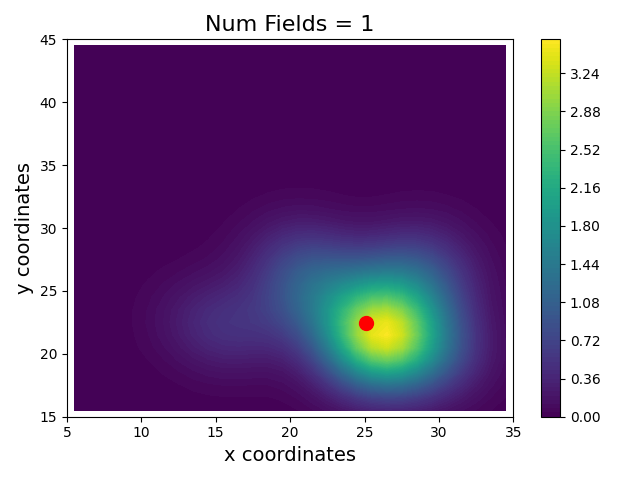

In [36]:
activity_map_x_center_coord = spatial_metrics_output['fields_x_max']
activity_map_y_center_coord = spatial_metrics_output['fields_y_max']

plt.figure()
plt.contourf(spatial_metrics_output['x_center_bins'],spatial_metrics_output['y_center_bins'],spatial_metrics_output['activity_map_smoothed'],100)
# plt.pcolormesh(spatial_metrics_output['x_center_bins'],spatial_metrics_output['y_center_bins'],spatial_metrics_output['activity_map_smoothed'])
plt.colorbar()
plt.plot(activity_map_x_center_coord,activity_map_y_center_coord,'r.',markersize=20)

plt.title('Num Fields = {0}'.format(spatial_metrics_output['num_of_fields']) ,fontsize=16)
plt.xlabel('x coordinates',fontsize=14)
plt.ylabel('y coordinates',fontsize=14)
plt.xlim([environment_edges[0][0],environment_edges[0][1]])
plt.ylim([environment_edges[1][0],environment_edges[1][1]])
plt.tight_layout()
plt.show()


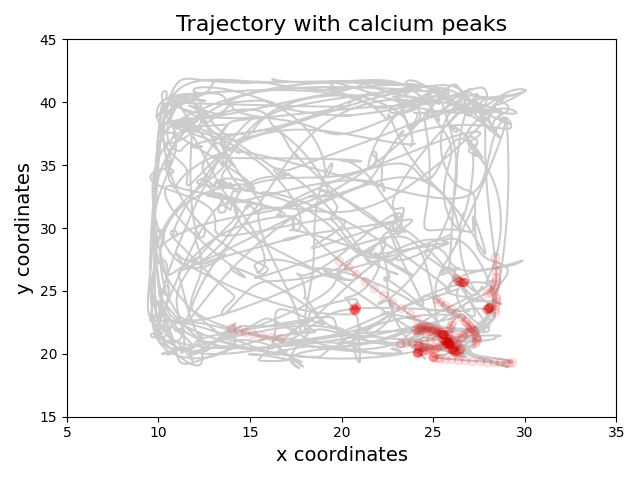

In [41]:

x_peaks_location = spatial_metrics_output['x_peaks_location']
y_peaks_location = spatial_metrics_output['y_peaks_location']

plt.figure()
plt.plot(x_coordinates,y_coordinates,'k',alpha=0.2)
plt.scatter(x_peaks_location,y_peaks_location,alpha=0.1,color='red')
plt.title('Trajectory with calcium peaks',fontsize=16)
plt.xlabel('x coordinates',fontsize=14)
plt.ylabel('y coordinates',fontsize=14)
plt.xlim([environment_edges[0][0],environment_edges[0][1]])
plt.ylim([environment_edges[1][0],environment_edges[1][1]])
plt.tight_layout()
plt.show()


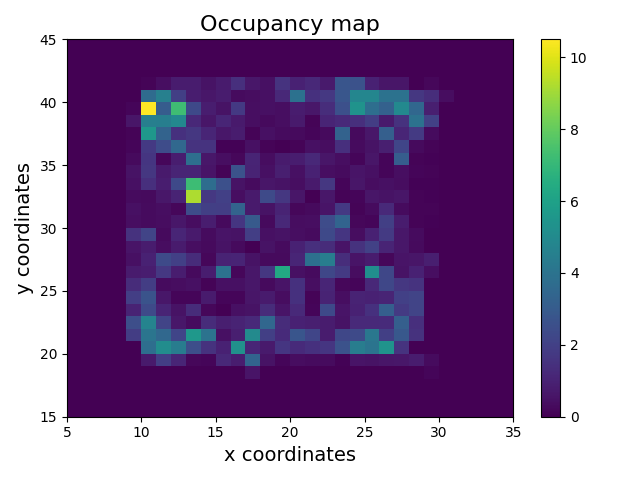

In [42]:

plt.figure()
plt.pcolormesh(spatial_metrics_output['x_center_bins'],spatial_metrics_output['y_center_bins'],spatial_metrics_output['timespent_map'])
plt.colorbar()
plt.title('Occupancy map',fontsize=16)
plt.xlabel('x coordinates',fontsize=14)
plt.ylabel('y coordinates',fontsize=14)
plt.xlim([environment_edges[0][0],environment_edges[0][1]])
plt.ylim([environment_edges[1][0],environment_edges[1][1]])
plt.tight_layout()
plt.show()


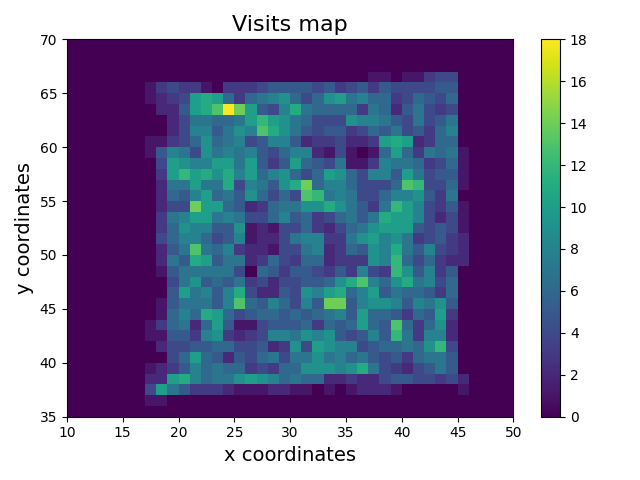

In [107]:

plt.figure()
plt.pcolormesh(spatial_metrics_output['x_center_bins'],spatial_metrics_output['y_center_bins'],spatial_metrics_output['visits_map'])
plt.colorbar()
plt.title('Visits map',fontsize=16)
plt.xlabel('x coordinates',fontsize=14)
plt.ylabel('y coordinates',fontsize=14)
plt.xlim([environment_edges[0][0],environment_edges[0][1]])
plt.ylim([environment_edges[1][0],environment_edges[1][1]])
plt.tight_layout()
plt.show()


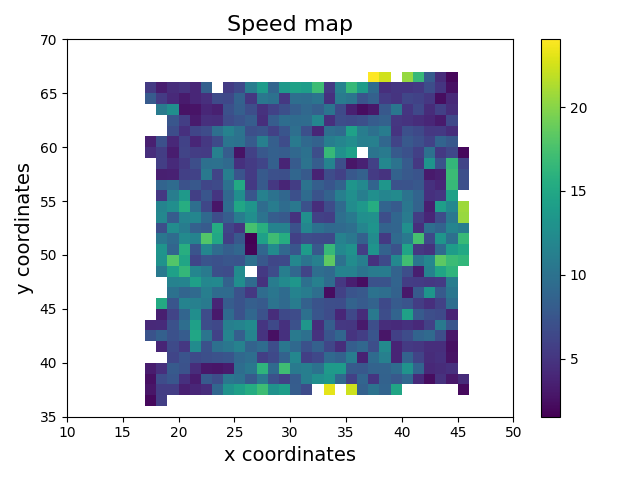

In [108]:


plt.figure()
plt.pcolormesh(spatial_metrics_output['x_center_bins'],spatial_metrics_output['y_center_bins'],spatial_metrics_output['speed_map'])
plt.colorbar()
plt.title('Speed map',fontsize=16)
plt.xlabel('x coordinates',fontsize=14)
plt.ylabel('y coordinates',fontsize=14)
plt.xlim([environment_edges[0][0],environment_edges[0][1]])
plt.ylim([environment_edges[1][0],environment_edges[1][1]])
plt.tight_layout()
plt.show()
